In [1]:
import pandas as pd
import numpy as np
import smtplib
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp = pd.read_csv('xAPI-Edu-Data.csv')
sp.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


In [3]:
cvtnum_sp = sp

gender_map = {'M':1, 
              'F':2}

NationalITy_map = {  'Iran': 1,
                     'SaudiArabia': 2,
                     'USA': 3,
                     'Egypt': 4,
                     'Lybia': 5,
                     'lebanon': 6,
                     'Morocco': 7,
                     'Jordan': 8,
                     'Palestine': 9,
                     'Syria': 10,
                     'Tunis': 11,
                     'KW': 12,
                     'KuwaIT': 12,
                     'Iraq': 13,
                     'venzuela': 14}
PlaceofBirth_map =  {'Iran': 1,
                     'SaudiArabia': 2,
                     'USA': 3,
                     'Egypt': 4,
                     'Lybia': 5,
                     'lebanon': 6,
                     'Morocco': 7,
                     'Jordan': 8,
                     'Palestine': 9,
                     'Syria': 10,
                     'Tunis': 11,
                     'KW': 12,
                     'KuwaIT': 12,
                     'Iraq': 13,
                     'venzuela': 14}

StageID_map = {'HighSchool':1, 
               'MiddleSchool':2,
               'lowerlevel':3}

GradeID_map =   {'G-02':2,
                 'G-08':8,
                 'G-09':9,
                 'G-04':4,
                 'G-05':5,
                 'G-06':6,
                 'G-07':7,
                 'G-12':12,
                 'G-11':11,
                 'G-10':10}

SectionID_map = {'A':1,  
                 'B':2,
                 'C':3}

Topic_map  =    {'Biology' : 1,
                 'Geology' : 2,
                 'Quran' : 3,
                 'Science' : 4,
                 'Spanish' : 5,
                 'IT' : 6,
                 'French' : 7,
                 'English' :8,
                 'Arabic' :9,
                 'Chemistry' :10,
                 'Math' :11,
                 'History' : 12}
Semester_map = {'S':1, 
                'F':2}

Relation_map = {'Mum':1, 
                'Father':2} 

ParentAnsweringSurvey_map = {'Yes':1,
                             'No':0}

ParentschoolSatisfaction_map = {'Bad':0,
                                'Good':1}

StudentAbsenceDays_map = {'Under-7':0,
                          'Above-7':1}

Class_map = {'H':10,
             'M':5,
             'L':2}

cvtnum_sp.gender  = cvtnum_sp.gender.map(gender_map)
cvtnum_sp.NationalITy     = cvtnum_sp.NationalITy.map(NationalITy_map)
cvtnum_sp.PlaceofBirth     = cvtnum_sp.PlaceofBirth.map(PlaceofBirth_map)
cvtnum_sp.StageID       = cvtnum_sp.StageID.map(StageID_map)
cvtnum_sp.GradeID = cvtnum_sp.GradeID.map(GradeID_map)
cvtnum_sp.SectionID    = cvtnum_sp.SectionID.map(SectionID_map)
cvtnum_sp.Topic     = cvtnum_sp.Topic.map(Topic_map)
cvtnum_sp.Semester   = cvtnum_sp.Semester.map(Semester_map)
cvtnum_sp.Relation   = cvtnum_sp.Relation.map(Relation_map)
cvtnum_sp.ParentAnsweringSurvey   = cvtnum_sp.ParentAnsweringSurvey.map(ParentAnsweringSurvey_map)
cvtnum_sp.ParentschoolSatisfaction   = cvtnum_sp.ParentschoolSatisfaction.map(ParentschoolSatisfaction_map)
cvtnum_sp.StudentAbsenceDays   = cvtnum_sp.StudentAbsenceDays.map(StudentAbsenceDays_map)
cvtnum_sp.Class  = cvtnum_sp.Class.map(Class_map)

In [4]:
cvtnum_sp.corr()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
gender,1.000000,-0.115850,-0.106873,0.017793,-0.018304,-0.054907,-0.004336,0.049156,-0.195142,0.149978,0.210932,0.052139,0.124703,0.022359,0.093478,-0.209011,0.259713
NationalITy,-0.115850,1.000000,0.905239,0.004731,0.007082,0.010240,0.045876,0.150257,0.237680,-0.061462,-0.100490,-0.143961,0.042010,0.017254,-0.039137,-0.000887,-0.076871
PlaceofBirth,-0.106873,0.905239,1.000000,0.038040,-0.026669,0.035751,0.075617,0.141741,0.242518,-0.100488,-0.116153,-0.166138,0.020353,0.043879,-0.015922,0.029063,-0.081499
StageID,0.017793,0.004731,0.038040,1.000000,-0.951452,0.296416,0.101451,0.029512,-0.034205,-0.172751,-0.068621,-0.163666,-0.161406,-0.114025,0.014272,0.112536,-0.073349
GradeID,-0.018304,0.007082,-0.026669,-0.951452,1.000000,-0.329056,-0.091057,-0.076370,0.034626,0.194382,0.078741,0.198552,0.180966,0.116915,-0.018349,-0.084896,0.061269
SectionID,-0.054907,0.010240,0.035751,0.296416,-0.329056,1.000000,-0.142515,-0.046763,-0.005783,-0.143862,-0.080909,-0.144955,-0.102538,-0.018449,-0.070405,-0.037062,-0.036378
Topic,-0.004336,0.045876,0.075617,0.101451,-0.091057,-0.142515,1.000000,0.010069,0.014026,-0.146281,-0.142789,-0.104989,-0.038416,0.001485,-0.032494,0.087633,-0.062911
Semester,0.049156,0.150257,0.141741,0.029512,-0.076370,-0.046763,0.010069,1.000000,0.148705,-0.178358,-0.173219,-0.287066,-0.019083,-0.023628,0.025258,0.072462,-0.121480
Relation,-0.195142,0.237680,0.242518,-0.034205,0.034626,-0.005783,0.014026,0.148705,1.000000,-0.364237,-0.360240,-0.339505,-0.026720,-0.163811,-0.287698,0.219687,-0.410879
raisedhands,0.149978,-0.061462,-0.100488,-0.172751,0.194382,-0.143862,-0.146281,-0.178358,-0.364237,1.000000,0.691572,0.643918,0.339386,0.316570,0.297015,-0.463882,0.623671


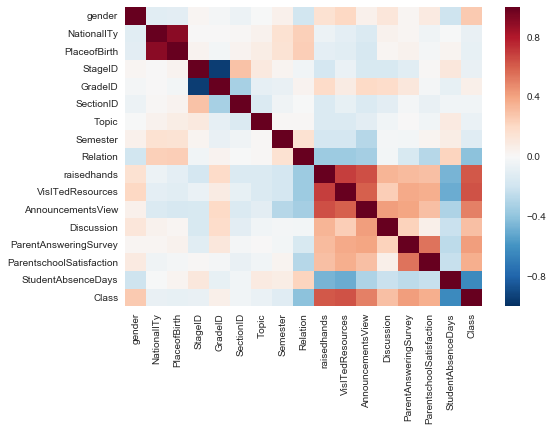

In [7]:

variable_correlations = cvtnum_sp.corr()
#variable correlations heatmap
sns.heatmap(variable_correlations)

### Display correlated attribute pair
We would like to see the attribute pair correlation value; how each attribute related to others.

In [8]:
pearson = variable_correlations.corr(method='pearson')

attrs = pearson.iloc[:-1,:-1] 
threshold = 0.84
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
    
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

,attribute pair,correlation
0,"(GradeID, StageID)",-0.997693
4,"(NationalITy, PlaceofBirth)",0.992399
2,"(VisITedResources, raisedhands)",0.954330
5,"(AnnouncementsView, raisedhands)",0.934370
3,"(AnnouncementsView, VisITedResources)",0.906494
6,"(StudentAbsenceDays, VisITedResources)",-0.871448
1,"(StudentAbsenceDays, raisedhands)",-0.849543


**(GradeID, StageID)** and **(NationalITy, PlaceofBirth)** can be ignored as both are irrelevant.

**(VisITedResources, raisedhands)**, **(AnnouncementsView, raisedhands)** and **(AnnouncementsView, VisITedResources)** have the highest correlation; which make can be assumed that good students tend to visits a course content, raised hand in classroom and regularly check new announcement. 

Interestingly, students that absence in the class are also highly correlated negatively on their involement in classroom (less raised hand) and rarely visit course content. 

### Classification Modelling
In this modelling, we will use most of dataset features as our predictor.

In [57]:
#Assign to new variable
data_forpredict = cvtnum_sp
y = cvtnum_sp.Class

# Pull out features for future use
features = data_forpredict.columns
X = data_forpredict.as_matrix().astype(np.float)

# This is important
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(cvtnum_sp.Class)

Feature space holds 480 observations and 17 features
Unique target labels: [ 2  5 10]


### Train and Test set using scikit-learn libraries
Cross validation attempts to avoid overfitting (training on and predicting the same datapoint) while still producing a prediction for each observation dataset. This is accomplished by systematically hiding different subsets of the data while training a set of models. After training, each model predicts on the subset that had been hidden to it, emulating multiple train-test splits. When done correctly, every observation will have a 'fair' corresponding prediction.

In [58]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()

    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

### Prediction algorithm

In [75]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import tree

def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X,y,SVC))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X,y,KNN))
print "Decision Trees:"
print "%.3f" % accuracy(y, run_cv(X,y,tree.DecisionTreeClassifier))

Support vector machines:
0.983
K-nearest-neighbors:
0.875
Decision Trees:
1.000


From the accuracy we can see that **Decision Tree** produce highest value of 100% compared to others. This are explainable as Decision Tree have advantages of handling large numbers of features. **SVM** performed well but with slight inaccuracy. SVM is good at two class classification this might affect the accuracy rate. KNN performance depends on K value and need large number of samples for accuracy. 

### Confusion Matrix
We use confusion matrix to see the classes of True Positive / Negative and False Positive / Negative by comparing all 3 algorithms.

In [60]:
#Declare neccessary function for confusion matrix
from sklearn.metrics import confusion_matrix

y = np.array(y)
class_names = np.unique(y)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

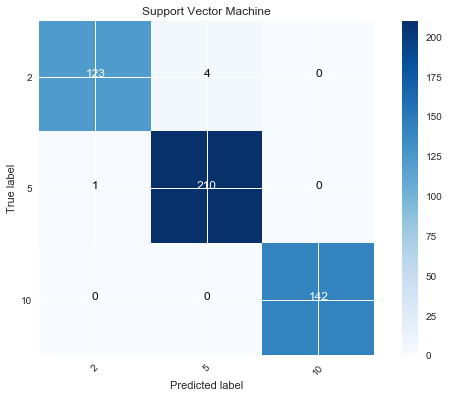

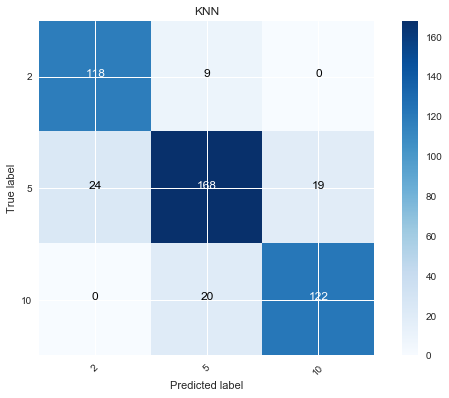

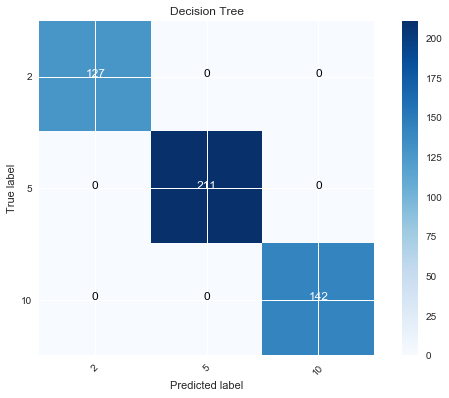

In [77]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y,run_cv(X,y,SVC))
cnf_matrix2 = confusion_matrix(y,run_cv(X,y,KNN))
cnf_matrix3 = confusion_matrix(y,run_cv(X,y,tree.DecisionTreeClassifier))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Support Vector Machine')
plt.show()
plot_confusion_matrix(cnf_matrix2, classes=class_names,
                      title='KNN')
plt.show()
plot_confusion_matrix(cnf_matrix3, classes=class_names,
                      title='Decision Tree')
plt.show()

In [82]:
from sklearn.metrics import classification_report
print "Support vector machines:"
print(classification_report(y, run_cv(X,y,SVC)))
print "KNN:"
print(classification_report(y, run_cv(X,y,KNN)))
print "Decision Tree:"
print(classification_report(y, run_cv(X,y,tree.DecisionTreeClassifier)))

Support vector machines:
             precision    recall  f1-score   support

          2       0.98      0.97      0.98       127
          5       0.98      0.99      0.99       211
         10       1.00      1.00      1.00       142

avg / total       0.99      0.99      0.99       480

KNN:
             precision    recall  f1-score   support

          2       0.83      0.91      0.86       127
          5       0.86      0.82      0.84       211
         10       0.89      0.89      0.89       142

avg / total       0.86      0.86      0.86       480

Decision Tree:
             precision    recall  f1-score   support

          2       1.00      1.00      1.00       127
          5       1.00      1.00      1.00       211
         10       1.00      1.00      1.00       142

avg / total       1.00      1.00      1.00       480



**i. Recall**

This refer to ***When students classified in High / Medium / Low level class, how often does my classifier predict that correctly? ***

Out of all the class level, Decision Tree correctly retrieved all 480 out of 480. This translates to a churn "recall" of 100%, followed by SVM (≈99%) and k-nearest-neighbors (≈86%).

**ii. Precision**

This refer to ***When a classifier predicts students classified in High / Medium / Low level class, how often does that students actually belong to that class?***

Decison Tree again out preforms the other two algorithm with 100% precision followed by SVM at 99%. k-nearest-neighbors lags at about 86%.



## Conclusion

In this experiment, we show the desriptive analytics during the EDA section and compare the relationship of numerical attributes in Linear Regression / Scatter Plot. We also performed the predictive analytics on the classification of **Students Academic Performance** and we able to show that all algorithms performs well in correctly classified the High / Medium / Low level class numerical intervals based on their total grade/mark.